## CSC 820 Natural Langauge Technologies
### HW 12
- > Khalid Mehtab Khan
- > SFSU ID: 923673423

- Importing Necessary Libraries
- genism for word2vec functionalities
- Logistic Regression For the Model Training frorm sklearn

In [29]:
import os
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

* > Loading the dataset
- Training json
- Test json

In [30]:
data = pd.read_json('train.json')
test = pd.read_json('test.json')

* > Data Dimensions
- Using the shape function of the pandas library we can see the dimension of our datasets
- The dimensions represt the matrix arrangment of the data

In [31]:
print('Training data shape: {}'.format(data.shape))
print('Test data shape: {}'.format(test.shape))

Training data shape: (39774, 3)
Test data shape: (9944, 2)


- We can see that shape ( 39774, 3) represents the training data set
- It has 3 columns other than the index
- id, cuisine and ingrideints
- Here cuisisne will be our target vairable 
- and the list of ingredients will be the list of words for each cuisine data point to be used as predictors

In [32]:
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


* > Target: cuisine

- As the end goal of the the modeling process is estimating the cuisine of a dish given ingridients
- The target variable can be set to the cuisine coullmn of the dataset

In [33]:
# Target variable 
target = data.cuisine
target

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

## Feature Creation
- ingridient count

- We can create new colunms to be used as features or suppoorting variales
- As it is easy to perform operations on the data values using pandas

In [34]:
data['ingredient_count'] = data.ingredients.apply(lambda x: len(x))
data

,id,cuisine,ingredients,ingredient_count
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


## Function flatten lists
- This function is used in case of nested lists
- If we are expecting an array of elements but some of those elements are arrays themselves
- The function faltten the list, meaning, it removes the nesting
- And converts it into a single list containing all the elmenets of the list 

In [35]:
def flatten_lists(lst):
    """Remove nested lists."""
    return [item for sublist in lst for item in sublist]

## Observations
* > Most Popular ingridient
- We can see that the most pouplar ingridient is salt. 
- It is also becuase salt is part of many dishes across all cuisines
- Other than that
- Olive oil, wwarer, onions, garlic are other popular ingridients


* > Avg Number of Ingridients
- We can see that there is no outlier in this graph like the previous one of Most Popular Ingridients
- Still the Avg number of ingridinets in dishes from moroccan, indian, vietnamese, thai, chinese cuisines meals is high
- This points towards the complexity of the dishes from these cuisine and the presence of spices and other ingridients
- OVer 12 ingridients on and average
- Dishes from, Irsish cuisne has the lowst avegrage values



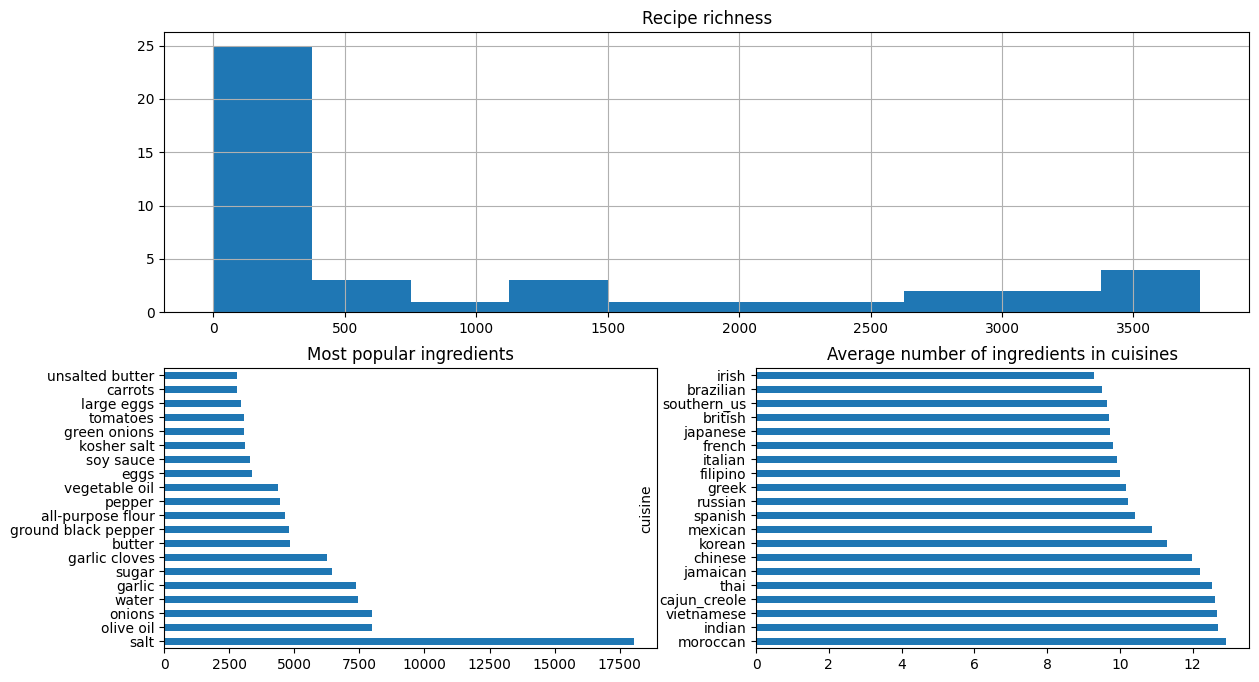

In [36]:
f = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[0, :])
data.ingredient_count.value_counts().hist(ax=ax1)
ax1.set_title('Recipe richness', fontsize=12)

ax2 = plt.subplot(gs[1, 0])
pd.Series(flatten_lists(list(data['ingredients']))).value_counts()[:20].plot(kind='barh', ax=ax2)
ax2.set_title('Most popular ingredients', fontsize=12)

ax3 = plt.subplot(gs[1, 1])
data.groupby('cuisine').mean()['ingredient_count'].sort_values(ascending=False).plot(kind='barh', ax=ax3)
ax3.set_title('Average number of ingredients in cuisines', fontsize=12)

plt.show()

## Word2Vec Model

- We create a word to vector representation of the ingridients
- Each ingridient is represented as vector
- First we
- Convert ingredients data into a list format.
- Set vector size to 350 to determine the dimensionality of ingredient vectors.
- Use a window size of 10 to define the number of ingredients considered for context on each side of a target ingredient.
- Set minimum count to 2, excluding ingredients that appear less than twice.
- Train the model over 20 epochs to reinforce learning.

In [37]:
# Feed a word2vec with the ingredients
w2v = gensim.models.Word2Vec(list(data.ingredients), vector_size=350, window=10, min_count=2, epochs=20)

## most_similar method gensim
- We can use the most similar method of the gensim model to get the most similar vectors in ths case ingridients
- For a given ingridient

* > Getting similarities

In [38]:
w2v.wv.most_similar('salt')

[('kosher salt', 0.5473541617393494),
 ('sea salt', 0.5068390965461731),
 ('coarse salt', 0.4218555986881256),
 ('fine sea salt', 0.3968307673931122),
 ('coarse sea salt', 0.30754968523979187),
 ('seasoning salt', 0.3049393892288208),
 ('smoked haddock fillet', 0.29109448194503784),
 ('ground caraway', 0.27967652678489685),
 ('fat free reduced sodium chicken broth', 0.2624564468860626),
 ('turkey thigh', 0.2551688551902771)]

In [39]:
w2v.wv.most_similar('chicken')


[('chicken breasts', 0.7424553632736206),
 ('chicken thighs', 0.7236237525939941),
 ('boneless chicken breast', 0.7027428150177002),
 ('boneless skinless chicken breasts', 0.6790673732757568),
 ('chicken pieces', 0.6620485186576843),
 ('cooked chicken', 0.6490309238433838),
 ('boneless chicken skinless thigh', 0.6264762878417969),
 ('chicken meat', 0.6104921698570251),
 ('chicken legs', 0.6003031134605408),
 ('boneless skinless chicken breast halves', 0.5763651728630066)]

## Function document vector
- The function create a final vector for each dish
- It Calculate the average of the vectors of the words that remain in the document. This results in a single vector representing the entire document.

- It also takes care of cases where it has to remove words from the document that are not in the model's vocabulary to ensure only known words are processed.
- And If no words remain after filtering, return a zero vector of the same length as the model's vectors.

In [40]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    # Filter out words that are not in the vocabulary
    doc = [word for word in doc if word in w2v.wv.key_to_index]
    # Check if document is empty after filtering
    if len(doc) == 0:
        return np.zeros(w2v.vector_size)
    # Average the vectors for the words in the document
    return np.mean([w2v.wv[word] for word in doc], axis=0)


- applying the documnet vector function to all datapoints in training and test sets

In [41]:
data['doc_vector'] = data.ingredients.apply(document_vector)
test['doc_vector'] = test.ingredients.apply(document_vector)

- We can see how each dish is represented in a vector form 
- in the doc_vector column

In [42]:
data

,id,cuisine,ingredients,ingredient_count,doc_vector
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,"[0.09905726, -0.5255688, 0.08747007, 0.5779807..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,"[0.18907668, -0.22719198, 0.18476583, -0.00532..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,"[-0.04562643, -0.22026049, 0.068253316, 0.0773..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,"[-0.21273896, 0.044426747, -0.18224078, 0.3191..."
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,"[-0.019611377, 0.1079983, -0.0646946, 0.071007..."
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12,"[0.12508759, -0.052548498, 0.28565753, 0.14371..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7,"[-0.06810669, -0.11683525, -0.14103071, 0.2997..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12,"[0.28826156, 0.17721267, 0.09363211, 0.0855735..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21,"[0.13800804, 0.12218081, -0.037878484, -0.2486..."


## Classification Model

* > LabelEncoder() - to encode categorical variables, that is dishes names in to numbercal values
- We Initialize Label Encoder to Create an instance of LabelEncoder.
- Apply the fit_transform method to learn the categories from the target data and convert them into a numeric array.

In [43]:
lb = LabelEncoder()
y = lb.fit_transform(target)

* > creating X 
- for training predictor values 

* > X_test
- for predictor values from the test set


In [44]:
X = list(data['doc_vector'])
X_test = list(test['doc_vector'])

## Model Training: Logistic Regresson
- using the encoded true labels
- and the vectorized data points for each cusine we can train a logistic regression model.
- Where each class will be the cuisine

In [45]:
clf = LogisticRegression(C=100)
clf.fit(X, y)

LogisticRegression(C=100)

### Getting model predictions
testing the model on the test data

In [46]:
y_test = clf.predict(X_test)
y_pred = lb.inverse_transform(y_test)

* > Exporting the predictions
- We can save the predictied values to a csv files

In [47]:
test_id = [id_ for id_ in test.id]
sub = pd.DataFrame({'id': test_id, 'cuisine': y_pred}, columns=['id', 'cuisine'])
sub.to_csv('clf_output.csv', index=False)

In [48]:
predicted_df = pd.read_csv('clf_output.csv') 
true_df = pd.read_csv('sample_submission.csv') 


- We can see how did the model perform by comaring the true labels and the predicted labels
- The true labels can be found in the submissions csv file

In [49]:
merged_df = pd.merge(predicted_df, true_df, on='id', suffixes=('_pred', '_true'))
merged_df


,id,cuisine_pred,cuisine_true
0,18009,british,italian
1,28583,french,italian
2,41580,italian,italian
3,29752,cajun_creole,italian
4,35687,italian,italian
...,...,...,...
9939,30246,french,italian
9940,36028,southern_us,italian
9941,22339,italian,italian
9942,42525,southern_us,italian


## Visualizing some words together

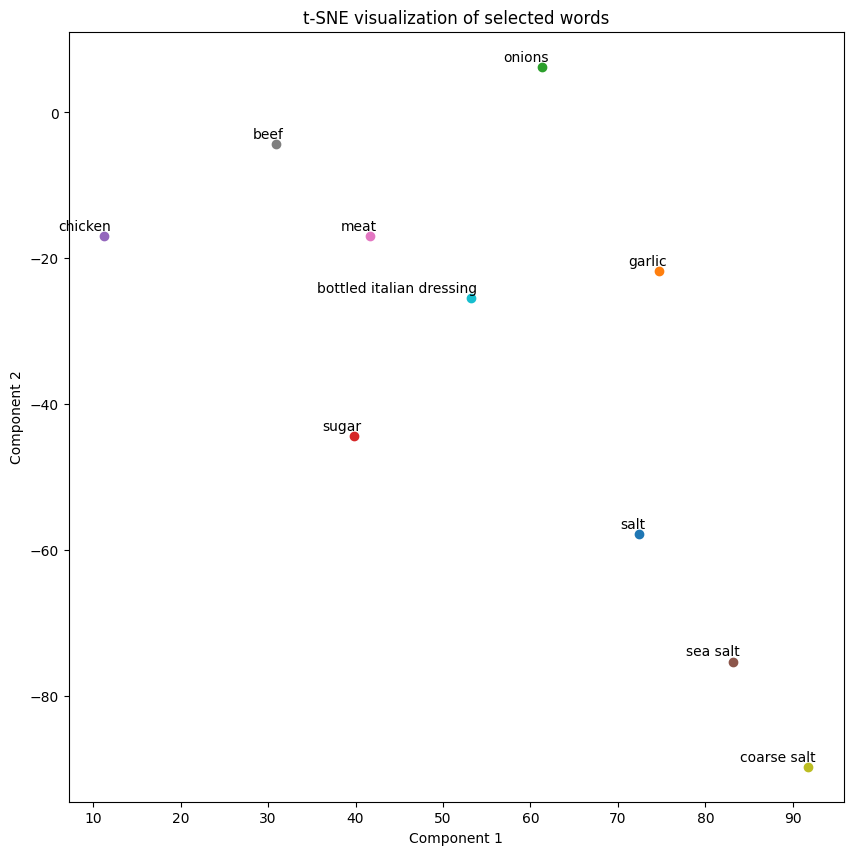

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim.models


words = ["salt", "garlic", "onions", "sugar", "chicken", "sea salt", "meat" , "beef", "coarse salt", "bottled italian dressing"]

word_vectors = np.array([w2v.wv[word] for word in words if word in w2v.wv])

tsne = TSNE(n_components=2, random_state=0, perplexity=2)
embeddings_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    if word in w2v.wv:
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
        plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE visualization of selected words')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
